### 2. Random Forest

In [1]:
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('df_next.csv')
data = data.drop(columns="Unnamed: 0")
data.head(-20)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0000
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0000
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0000
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0000
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
357916,7.0,32.0,70.0,2.0,4.0,69.0,3.0,4.0,138.0,5.0,1.0,1.0000
357917,7.0,17.0,11.0,2.0,10.0,12.0,4.0,10.0,25.0,9.0,1.0,20.1772
357918,7.0,2.0,75.0,0.0,7.0,72.0,0.0,7.0,142.0,2.0,1.0,10.0000
357919,7.0,26.0,49.0,2.0,16.0,49.0,4.0,16.0,98.0,9.0,1.0,20.0950


In [3]:
y = data.iloc[:,0].values
X = data.iloc[:,1:].values
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])

classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 42)
print("Shape_train:", X_train.shape, "\n"
      "Shape_test: ", X_test.shape, "\n"
      "Shape_y:    ", y.shape)

Shape_train: (239820, 11) 
Shape_test:  (118121, 11) 
Shape_y:     (357941, 8)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

In [5]:
scaler = StandardScaler()
clf = OneVsRestClassifier(RandomForestClassifier(warm_start=True,n_estimators=20, max_depth = 10, random_state = 1))

pipe_rnd = Pipeline([('scl', scaler),('clf', clf)])
parametrs = {'n_estimators': range(1, 12), 'max_depth': range(1, 12)}
scores = ['f1']

In [6]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf = RandomForestClassifier()
    grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)
    grid_search_cv_clf.fit(X_train, y_train)

    print("Best parameters:")
    print()
    print(grid_search_cv_clf.best_params_)
    print()
    print("Grid scores:")
    print()
    means = grid_search_cv_clf.cv_results_['mean_test_score']
    stds = grid_search_cv_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search_cv_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    best_clf = grid_search_cv_clf.best_estimator_
    pipe_forest = best_clf.fit(X_train, y_train)
    y_pred_train = pipe_forest.predict(X_train)
    y_pred_test = pipe_forest.predict(X_test)
    
    target_names = ['DoS', 'Data_probing', 'Malitious_control', 'Malitious_operation', 'Scan',
                'Spying', 'Wrong_SetUp', 'Normal']
    print(classification_report(y_train, y_pred_train, target_names=target_names))
    print()
    print(classification_report(y_test, y_pred_test, target_names=target_names))
    print("DecisionTreeClassifier_bestPar: ", best_clf)

# Tuning hyper-parameters for f1

Best parameters:

{'max_depth': 11, 'n_estimators': 8}

Grid scores:

0.975 (+/-0.004) for {'max_depth': 1, 'n_estimators': 1}
0.974 (+/-0.005) for {'max_depth': 1, 'n_estimators': 2}
0.972 (+/-0.001) for {'max_depth': 1, 'n_estimators': 3}
0.974 (+/-0.005) for {'max_depth': 1, 'n_estimators': 4}
0.973 (+/-0.004) for {'max_depth': 1, 'n_estimators': 5}
0.973 (+/-0.004) for {'max_depth': 1, 'n_estimators': 6}
0.974 (+/-0.005) for {'max_depth': 1, 'n_estimators': 7}
0.974 (+/-0.005) for {'max_depth': 1, 'n_estimators': 8}
0.972 (+/-0.001) for {'max_depth': 1, 'n_estimators': 9}
0.973 (+/-0.004) for {'max_depth': 1, 'n_estimators': 10}
0.973 (+/-0.005) for {'max_depth': 1, 'n_estimators': 11}
0.975 (+/-0.005) for {'max_depth': 2, 'n_estimators': 1}
0.976 (+/-0.004) for {'max_depth': 2, 'n_estimators': 2}
0.977 (+/-0.001) for {'max_depth': 2, 'n_estimators': 3}
0.977 (+/-0.001) for {'max_depth': 2, 'n_estimators': 4}
0.976 (+/-0.003) for {'max_depth': 2, '

##### Confusion matrix multiclass(Random Forest)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import itertools
import seaborn as sn

In [8]:
confusion_m = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

def confusion_matrix(confusion_m, classes,
                          normalize=False,
                          title=' ',
                          cmap=plt.cm.BuPu):

    if normalize:
        confusion_m = confusion_m.astype('float') / confusion_m.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix (Normalized)")
    else:
        print('Confusion matrix (without_normalization)')

    print(confusion_m)

    plt.imshow(confusion_m, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = confusion_m.max() / 2.
    for i, j in itertools.product(range(confusion_m.shape[0]), range(confusion_m.shape[1])):
        plt.text(j, i, format(confusion_m[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if confusion_m[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix (without_normalization)
[[  1298      0      0      0      0      0      0    631]
 [     0    110      0      0      0      0      0      0]
 [     0      0    294      0      0      0      0      0]
 [     0      0      0    172      0      0      0     91]
 [     0      0      0      0    486      0      0     17]
 [     0      0      0      0      0    175      0      0]
 [     0      0      0      0      0      0     35      0]
 [     2      0      0      0      2      0      0 114808]]


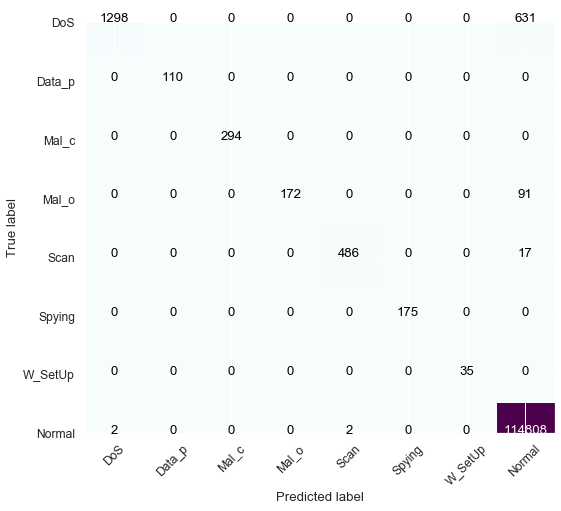

In [9]:
plt.figure(figsize = (8,8))
sn.set(font_scale=1.1)

confusion_matrix(confusion_m,['DoS', 'Data_p', 'Mal_c', 'Mal_o', 'Scan',
                'Spying', 'W_SetUp', 'Normal'])
plt.show()

##### Matthews correlation coefficient (RF)

In [10]:
matthews_corrcoef(y_train.argmax(axis=1), y_pred_train.argmax(axis=1))

0.8719844633297168

In [11]:
matthews_corrcoef(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

0.8788018038911574